### Perform Sentiment Analysis on the review_text to classify each review as positive, neutral, or negative.
Use a tool like VADER from the nltk library or TextBlob.
Calculate Sentiment Scores for each review.
Classify Sentiments based on compound scores:
Positive: Compound score > 0.05
Neutral: Compound score between -0.05 and 0.05
Negative: Compound score < -0.05

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mehed\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


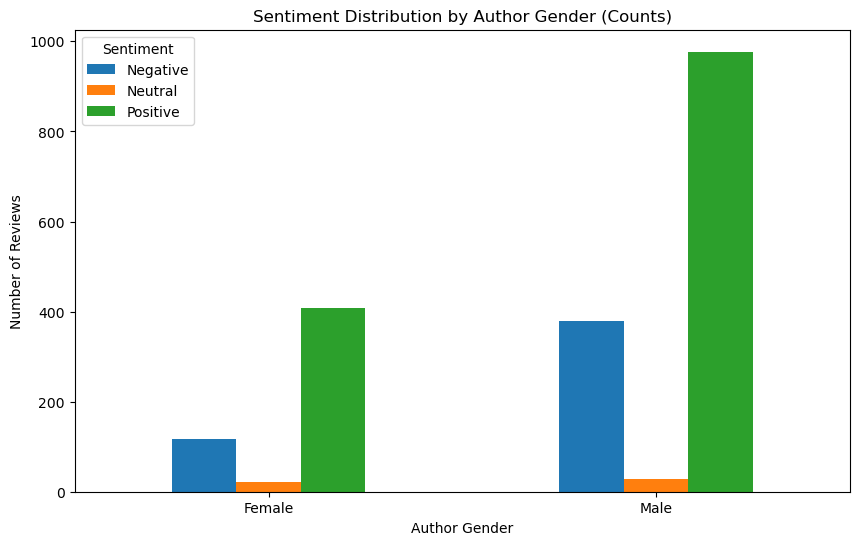

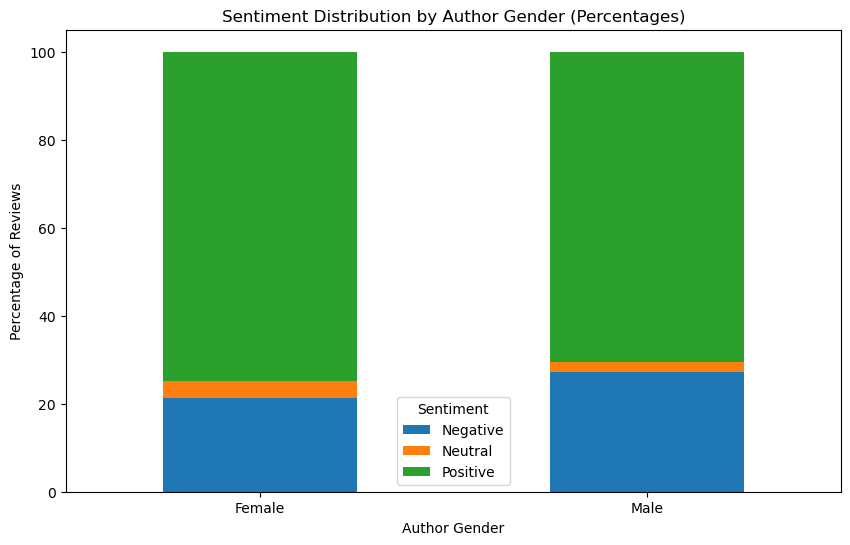

In [3]:

import nltk
nltk.download('vader_lexicon')
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt


file_path = r'C:\Users\mehed\Downloads\cleaned_dataset.csv'
data = pd.read_csv(file_path)

sid = SentimentIntensityAnalyzer()
data['sentiment_score'] = data['normalized_review_text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment'] = data['sentiment_score'].apply(classify_sentiment)
sentiment_counts = data.groupby(['author_gender', 'sentiment']).size().unstack(fill_value=0)
sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

sentiment_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Distribution by Author Gender (Counts)')
plt.xlabel('Author Gender')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()

sentiment_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Author Gender (Percentages)')
plt.xlabel('Author Gender')
plt.ylabel('Percentage of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()


### Statistical Test Results

In [5]:
from scipy.stats import chi2_contingency
frequency_table = sentiment_counts[['Positive', 'Negative']]
chi2_stat, p_value, dof, expected = chi2_contingency(frequency_table)

chi_square_results = {
    "Chi-Square Statistic": chi2_stat,
    "Degrees of Freedom": dof,
    "P-Value": p_value
}

chi_square_results


{'Chi-Square Statistic': 5.957169840913515,
 'Degrees of Freedom': 1,
 'P-Value': 0.01465755149778625}

### Proportions of Positive and Negative Reviews by Author Gender:

In [11]:
import nltk
nltk.download('brown')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from textblob import TextBlob
import pandas as pd

file_path = r'C:\Users\mehed\Downloads\cleaned_dataset.csv'
data = pd.read_csv(file_path)

if 'normalized_review_text' not in data or 'author_gender' not in data:
    raise KeyError("Required columns are missing.")

data.fillna({'normalized_review_text': '', 'author_gender': 'Unknown'}, inplace=True)

def classify_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    return 'Positive' if polarity > 0.05 else 'Negative' if polarity < -0.05 else 'Neutral'

data['sentiment'] = data['normalized_review_text'].apply(classify_sentiment)
sentiment_counts = data.groupby(['author_gender', 'sentiment']).size().unstack(fill_value=0)

if {'Positive', 'Negative'}.issubset(sentiment_counts.columns):
    proportions = sentiment_counts[['Positive', 'Negative']].div(sentiment_counts.sum(axis=1), axis=0) * 100
    proportions_result = {"Positive Proportions": proportions['Positive'], "Negative Proportions": proportions['Negative']}
else:
    proportions_result = {"Positive Proportions": None, "Negative Proportions": None}

proportions_result


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\mehed\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mehed\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mehed\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mehed\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


{'Positive Proportions': author_gender
 Female    70.932358
 Male      70.520231
 Name: Positive, dtype: float64,
 'Negative Proportions': author_gender
 Female    12.065814
 Male      10.621387
 Name: Negative, dtype: float64}